# How Did State COVID-19 Policies Shape Consumer Spending and Public Health Outcomes?

# PROJECT 1
**PLEASE READ**
\
After completing Project 1, I spoke with my professor and she suggested that I change my research topic entirely. Based on her feedback, I shifted my focus for Project 2 to a new research question and dataset. While this project explores a different issue, I have tried to incorporate the feedback I received from Project 1 to improve my approach. This includes refining my data analysis techniques, structuring my arguments more clearly, and using different plots. Although the topics are different, this project is based on the feedback from Project 1.


## 1. Introduction
The COVID-19 pandemic caused severe disruptions to both economic activity and public health, forcing governments to make difficult policy choices. U.S. states implemented different strategies, ranging from strict lockdowns and business closures to more relaxed approaches. These policies influenced consumer behavior, labor market trends, and health outcomes in unequal ways across states (Chetty et al., 2020). While some policies successfully slowed virus transmission, they also impacted economic resilience, raising important questions about the trade-offs between public health and economic recovery.

### 1.1 State Policies and Consumer Spending
Research shows that both government-mandated restrictions and voluntary behavioral changes played a role in economic decline (Goolsbee & Syverson, 2020; ; Toxvaerd, 2021). Some studies argue that fear of the virus, rather than lockdown policies alone, led to reduced consumer spending (Chetty et al., 2020). Even in states with fewer restrictions, individuals avoided non-essential spending in high-contact sectors such as restaurants, entertainment, and travel. However, lockdowns did have an independent impact on reducing consumer mobility and economic activity (Ligo et al., 2021; Dave et al., 2021).

Government stimulus measures helped offset some of the economic decline (Baker et al., 2020). Research on the U.S. stimulus checks shows that low-income households increased their spending sharply following payments, although the effect was temporary (Coibion et al., 2020). Similarly, the expansion of unemployment benefits helped sustain consumption for displaced workers (Gupta et al., 2020). However, once these benefits ended, economic disparities widened, as lower-income households cut back spending more than wealthier individuals (Crossley et al., 2021).

### 1.2 Economic Inequality and Recovery Patterns
The impact of COVID-19 policies varied across different demographic groups. Research shows that lower-income and minority communities suffered greater financial distress, job losses, and health consequences (Courtemanche et al., 2020). In contrast, wealthier individuals shifted their spending online, adapting more easily to economic restrictions (Andersen et al., 2022). This shift contributed to widening economic inequalities during the pandemic.

Recovery from the crisis also differed across states. Studies suggest that consumer confidence, rather than the lifting of restrictions alone, was a stronger driver of economic recovery (Serrano-Alarcón et al., 2021). States that reopened aggressively sometimes faced COVID-19 resurgences, which led to prolonged economic instability (Friedson et al., 2020). This suggests that uncontrolled reopenings may have delayed long-term recovery rather than accelerating it.

### 1.3 Balancing Public Health and Economic Outcomes
State policymakers had to balance economic recovery with public health risks. Studies comparing different policy responses find that countries with fewer restrictions experienced similar declines in consumer spending as those with strict lockdowns, suggesting that voluntary behavioral changes mattered as much as policies (Andersen et al., 2020). In the U.S., state reopening decisions were often influenced by political and economic pressures rather than public health data (Hsiang et al., 2020; Dave et al., 2021).

Clear public messaging may have played an important role in economic resilience. Research suggests that states with better public communication strategies saw higher compliance with safety measures, reducing economic disruptions (Carrieri et al., 2021). This indicates that policy effectiveness depended not only on regulations but also on public perception and trust.

### 1.4 Research Contribution
While previous studies have analyzed the effects of COVID-19 policies on consumer spending and public health outcomes, fewer have examined the long-term economic resilience of different states. This study fills that gap by analyzing how different policy choices influenced both economic and health outcomes over time. By integrating mobility data, government policy indices, and economic indicators, this research aim to provide a comprehensive analysis of the trade-offs between economic recovery and public health protection.

### 1.5 Data Sources and Cleaning Process
This study uses a combined dataset to examine how state-level COVID-19 policies influenced economic resilience. Consumer spending data comes from Opportunity Insights’ Economic Tracker. It tracks daily and weekly financial transactions to measure changes in household spending during lockdowns, stimulus payments, and reopenings (Chetty et al., 2020). Mobility data is from Ang et al. (2020), which provides human movement inflow and outflow data at different geographic levels in the U.S. This data helps analyze how mobility restrictions affected economic activity. Policy data is sourced from the Oxford COVID-19 Government Response Tracker (OxCGRT). It records daily policy changes, such as lockdowns, public health rules, and economic aid programs (Hale et al., 2021). Public health data comes from the Johns Hopkins University COVID-19 Dashboard, which tracks COVID-19 cases, hospitalizations, and deaths in real-time (Dong, Du, & Gardner, 2020).

Given the interest of this paper, the dependent variable (Y) has chosen to be consumer spending, which reflects economic resilience during the pandemic. It measures how households adjusted their spending in response to lockdowns, stimulus payments, and mobility changes. Spending is a key indicator of economic recovery, making it essential for understanding policy effectiveness. The independent variables (X) include mobility patterns, government policy indices, and COVID-19 incidence rates. Mobility data tracks movement trends, showing how restrictions and voluntary behaviors affected economic activity. Policy indices measure lockdown strictness, financial aid, and public health rules, which directly influenced consumer confidence and business operations. COVID-19 cases help separate policy effects from individual risk perception, as rising cases often lead to reduced spending even without government mandates. Together, these variables explain why spending patterns varied across states, helping to assess the trade-offs between economic recovery and public health.

To ensure data accuracy, all sources were aligned at the state-day level. This makes it easier to compare policy changes with economic and health trends. Missing values in policy and mobility data were filled using state-level averages to prevent gaps in the regression analysis. The final dataset combines economic trends, movement patterns, policy enforcement, and health data. 



### 1.6 Summary Statistics Tables

In [357]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import statsmodels.api as sm

os.chdir("/Users/xiuzh/Desktop/eco225-project-code-ruibosun") 

# Load the merged dataset
df = pd.read_csv("final_cleaned_spending_policies.csv", low_memory=False)


In [359]:
import pandas as pd

# Load dataset
df = pd.read_csv("for_regression.csv",low_memory=False)

# Select relevant columns (Y variable + at least 5 X variables)
selected_columns = [
    "spend_all",  # Dependent variable (Y) - total consumer spending
    "mobility_inflow", "mobility_outflow",  # Mobility indicators
    "StringencyIndex_Average", "GovernmentResponseIndex_Average",  # Policy indices
    "ContainmentHealthIndex_Average", "EconomicSupportIndex",  # Additional policy indices
    "Incident_Rate",
    "Confirmed","Deaths", "avg_pop_stay_at_home","avg_trips" # Public health indicator - COVID-19 case incidence rate
]

# Compute summary statistics
summary_stats = df[selected_columns].describe()
print(summary_stats)


          spend_all  mobility_inflow  mobility_outflow  \
count  61614.000000     6.161400e+04      6.161400e+04   
mean       0.074179     7.076724e+05      7.073667e+05   
std        0.106546     6.739497e+05      6.741299e+05   
min       -0.431000     2.406000e+03      3.012000e+03   
25%        0.018072     2.121569e+05      2.139599e+05   
50%        0.074179     7.076724e+05      7.073667e+05   
75%        0.138000     8.128225e+05      7.993651e+05   
max        0.540000     4.841437e+06      4.841598e+06   

       StringencyIndex_Average  GovernmentResponseIndex_Average  \
count             61614.000000                     61614.000000   
mean                 39.284166                        48.210031   
std                  16.487126                        10.553514   
min                  16.450000                        28.010000   
25%                  24.350000                        39.470000   
50%                  38.890000                        48.210031   
75%     

The summary statistics table has show that the dependent variable, spend_all, represents consumer spending. The average value is 0.074, meaning spending increased by 7.4% on average. However, there is substantial variation, with a standard deviation of 10.7%. The minimum value of -0.43 suggests that spending declined in some cases, while the maximum of 54% indicates strong growth in certain states or time periods.

Among the independent variables, mobility inflow and outflow measure the movement of people into and out of a state. Both have high averages, around 707,000, with a large spread. Some states have as few as 2,406 inflow and 3,012 outflow, while others exceed 4.8 million, reflecting different population sizes and travel patterns.

The Stringency Index, which captures the strictness of COVID-19 restrictions, has an average value of 39.3 on a scale from 0 to 100. Some states had very relaxed policies (16.5), while others imposed strict measures (93.5). Other policy indices follow a similar trend. The Government Response Index averages 48.2, while the Containment Health Index averages 49.6, suggesting a moderate level of restrictions overall. The Economic Support Index, which measures financial aid, has an average of 38.7, but varies widely, with some states providing no economic support (0) and others reaching the highest level (100).

The Incident Rate, representing COVID-19 cases per 100,000 people, averages 14,912 but varies significantly, with a standard deviation of 11,116. Some areas reported no cases (0), while others had infection rates exceeding 58,927 per 100,000. The Confirmed case count further illustrates this, with an average of 873,331 cases per state and a maximum of over 12 million. The Deaths variable has fewer observations, suggesting incomplete reporting, but the average death count is 11,579, with a maximum exceeding 101,000.

Finally, the average population staying at home is 80,661, though this varies greatly. Some states saw as few as 6,068 people staying home, while others had up to 425,634. Similarly, the average number of trips per state is around 821,488, with significant variation between states. The high variability in these mobility measures suggests that different states had different behavioral responses to the pandemic.

To further understand these patterns, the next step is to analyze the data by subgroups, comparing the groups of high and low policy stringency. This helps reveal how different levels of government restrictions influenced mobility, spending, and public health outcomes across states.

In [361]:
# Create a categorical variable for high vs. low stringency based on median split
df["High_Stringency"] = df["StringencyIndex_Average"] > df["StringencyIndex_Average"].median()

# Compute summary statistics by subgroup
subgroup_summary = df.groupby("High_Stringency")[selected_columns].describe()

# Display subgrouped summary statistics
print(subgroup_summary)


                spend_all                                             \
                    count      mean       std    min     25%     50%   
High_Stringency                                                        
False             30922.0  0.124027  0.084979 -0.095  0.0646  0.1150   
True              30692.0  0.023958  0.102412 -0.431 -0.0364  0.0595   

                                 mobility_inflow                 ...  \
                      75%    max           count           mean  ...   
High_Stringency                                                  ...   
False            0.177000  0.540         30922.0  746921.680630  ...   
True             0.074179  0.488         30692.0  668129.007126  ...   

                avg_pop_stay_at_home                avg_trips                 \
                                 75%            max     count           mean   
High_Stringency                                                                
False                            NaN  

This news summary statistics for subgroups: high and low-stringency states reveal key differences in spending, mobility, and economic support. In low-stringency states, the average consumer spending is 12.4%, while in high-stringency states, it drops to 2.4%. This suggests that states with fewer restrictions had stronger economic activity. The standard deviation is also smaller (0.085 vs. 0.102), meaning spending was more stable in low-stringency states. The minimum spending values are negative in both groups, indicating some periods of decline.

Mobility inflow is higher in low-stringency states, with an average of 746,922 people traveling into these areas daily. In high-stringency states, the average is lower at 668,129. This suggests that movement was more restricted in states with strict policies, possibly due to travel bans, business closures, and remote work policies.

The Economic Support Index is significantly higher in high-stringency states. The median support level is 62.5 in these states compared to 37.5 in low-stringency states. This suggests that states with stricter policies provided more financial assistance to individuals and businesses.

The Incident Rate is much higher in low-stringency states, averaging 22,038 cases per 100,000 people, compared to 7,732 in high-stringency states. This suggests that stricter policies were associated with lower infection rates. The minimum Incident Rate is zero in some states, but the maximum exceeds 58,927 per 100,000 in low-stringency states, reflecting the varied impact of the pandemic. These highlight the economic costs of restrictions and the potential benefits in controlling the pandemic.

 ### 1.7 Plots, Histograms, Figures

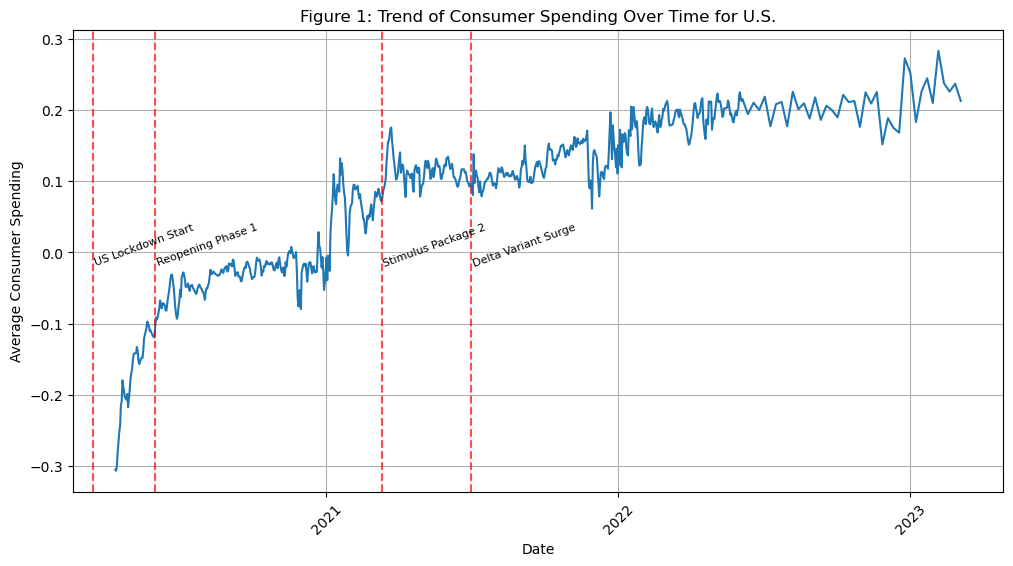

In [363]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("final_cleaned_spending_policies.csv", low_memory=False)
# Ensure Date is in datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Convert spend_all to numeric, coercing errors to NaN
df["spend_all"] = pd.to_numeric(df["spend_all"], errors="coerce")

# Drop NaN values in spend_all (optional, prevents issues during plotting)
df = df.dropna(subset=["spend_all"])

# Define important policy dates
policy_dates = {
    "US Lockdown Start": "2020-03-15",
    "Reopening Phase 1": "2020-06-01",
    "Delta Variant Surge": "2021-07-01",
    "Stimulus Package 2": "2021-03-11"
}

# Convert to datetime
policy_dates = {k: pd.to_datetime(v) for k, v in policy_dates.items()}


# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="spend_all", estimator="mean", errorbar=None)

# Add vertical lines and text annotations
for label, date in policy_dates.items():
    plt.axvline(date, color='red', linestyle='--', alpha=0.7)
    plt.text(date, df["spend_all"].min()*-0.1 , label, rotation=20, verticalalignment='top', fontsize=8, color='black')


# Formatting
plt.title("Figure 1: Trend of Consumer Spending Over Time for U.S.")
plt.xlabel("Date")
plt.ylabel("Average Consumer Spending")
plt.xticks(rotation=45)

# Set x-axis to display only yearly ticks
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(1))  # Show 1-year intervals
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y"))  # Format as "YYYY"

plt.grid()
plt.show()


Figure 1 was chosen because it shows how consumer spending changed over time in response to major COVID-19 events and policy shifts. The trend highlights a sharp decline in spending at the start of the pandemic, followed by gradual recovery. Key policy moments, such as lockdowns, stimulus packages, and variant surges. They are marked to show their possible effects. Spending initially dropped but rebounded as restrictions eased and financial aid was distributed. This pattern suggests that both government policies and public health developments played a role in shaping economic behavior. The figure directly connects to the research question by illustrating how state policies influenced consumer spending patterns throughout the pandemic.

From an economic perspective, this pattern supports the economics theory, which suggests that government intervention through fiscal policy can stabilize demand during economic shocks. The initial decline in spending reflects precautionary savings behavior, where consumers cut non-essential expenditures due to uncertainty about future income. 

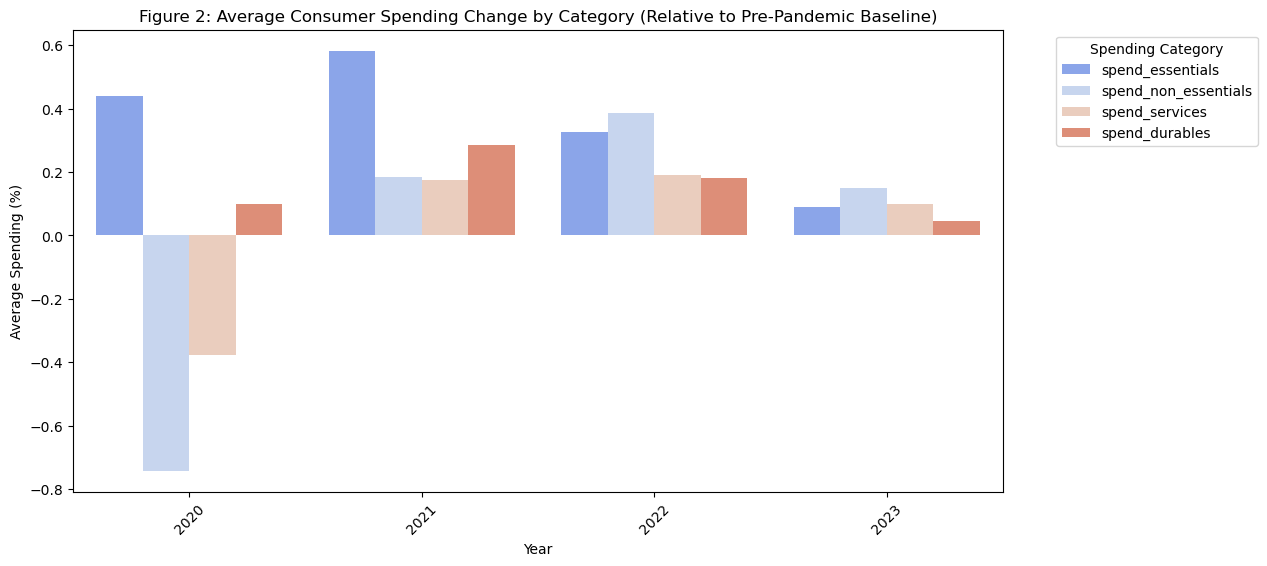

In [364]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("final_cleaned_spending_policies.csv", low_memory=False)

# Ensure Date is in datetime format and extract Year
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year

# Spending columns
spending_columns = ["spend_grf", "spend_hic", "spend_retail_w_grocery",
                    "spend_apg", "spend_aer", "spend_tws", "spend_retail_no_grocery",
                    "spend_remoteservices", "spend_hcs", "spend_inperson",
                    "spend_durables", "spend_nondurables"]

# Convert spending columns to numeric
df[spending_columns] = df[spending_columns].apply(pd.to_numeric, errors="coerce")

# Aggregate into categories
df["spend_essentials"] = df[["spend_grf", "spend_hic", "spend_retail_w_grocery"]].sum(axis=1, skipna=True)
df["spend_non_essentials"] = df[["spend_apg", "spend_aer", "spend_tws", "spend_retail_no_grocery"]].sum(axis=1, skipna=True)
df["spend_services"] = df[["spend_remoteservices", "spend_hcs", "spend_inperson"]].sum(axis=1, skipna=True)
df["spend_durables"] = df[["spend_durables", "spend_nondurables"]].sum(axis=1, skipna=True)

# Aggregate by Year
aggregated_spending_columns = ["spend_essentials", "spend_non_essentials", "spend_services", "spend_durables"]
df_yearly = df.groupby("Year")[aggregated_spending_columns].mean().reset_index()

# Reshape for visualization
df_melted = df_yearly.melt(id_vars=["Year"], value_vars=aggregated_spending_columns, 
                           var_name="Spending Category", value_name="Percentage")

# Plot Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Year", y="Percentage", hue="Spending Category", palette="coolwarm")

# Formatting
plt.xlabel("Year")
plt.ylabel("Average Spending (%)")
plt.title("Figure 2: Average Consumer Spending Change by Category (Relative to Pre-Pandemic Baseline)")
plt.legend(title="Spending Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)

plt.show()


Figure 2 provides a breakdown of consumer spending across different categories relative to pre-pandemic levels. Essential spending, such as groceries and healthcare, remained relatively stable or increased, reflecting inelastic demand. In contrast, non-essential spending, including retail and entertainment, experienced a sharp drop at the start of the pandemic. Service-based spending, such as travel and dining, showed the largest declines, consistent with restrictions on mobility and social distancing measures. Over time, spending patterns recovered, but the extent of recovery varied across categories.

These trends align with income elasticity of demand theory. Goods that are necessities (inelastic demand) remain in demand regardless of economic conditions, while other spending (elastic demand) fluctuates more significantly. The drop in service spending supports the idea that supply side restrictions, not just demand, influenced economic activity. Even when restrictions eased, some service based sectors did not fully recover, suggesting that consumer confidence and behavioral changes played a role. This figure complements Figure 1 by highlighting which areas of consumer spending were most affected by policy interventions and economic uncertainty.

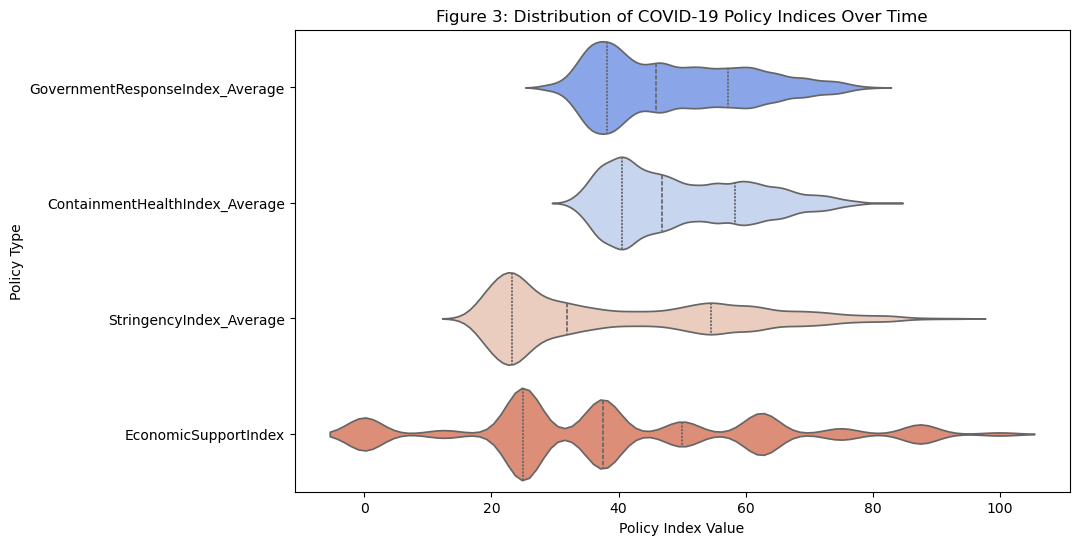

In [365]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv("final_cleaned_spending_policies.csv", low_memory=False)

# Ensure Date is in datetime format and extract year-month
df["Date"] = pd.to_datetime(df["Date"])
df["YearMonth"] = df["Date"].dt.to_period("M")

# Convert policy indices to numeric
policy_indices = ["GovernmentResponseIndex_Average", "ContainmentHealthIndex_Average", 
                  "StringencyIndex_Average", "EconomicSupportIndex"]

for col in policy_indices:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Reshape data for ridgeline plot
df_melted = df.melt(id_vars=["YearMonth"], value_vars=policy_indices, 
                     var_name="Policy Index", value_name="Index Value")

# Fix deprecated parameters in Seaborn violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_melted, x="Index Value", y="Policy Index", 
               density_norm="width", inner="quartile", hue="Policy Index", palette="coolwarm", legend=False)

plt.title("Figure 3: Distribution of COVID-19 Policy Indices Over Time")
plt.xlabel("Policy Index Value")
plt.ylabel("Policy Type")

plt.show()


Figure 3 presents the distribution of key policy indices, including the Government Response Index, Containment Health Index, Stringency Index, and Economic Support Index. The violin plots indicate considerable variation in policy stringency and support across states. Some states implemented consistently strict measures, while others had more moderate or fluctuating responses. Economic support also varied, with some states providing substantial aid and others offering limited financial assistance.

The differences in policy intensity suggest that economic outcomes, including spending behavior, may be state-specific rather than uniform nationwide. The figure also raises questions about the effectiveness of strict measures versus targeted interventions in shaping economic recovery. By illustrating these policy distributions, Figure 3 provides context for understanding why consumer spending varied across different states.


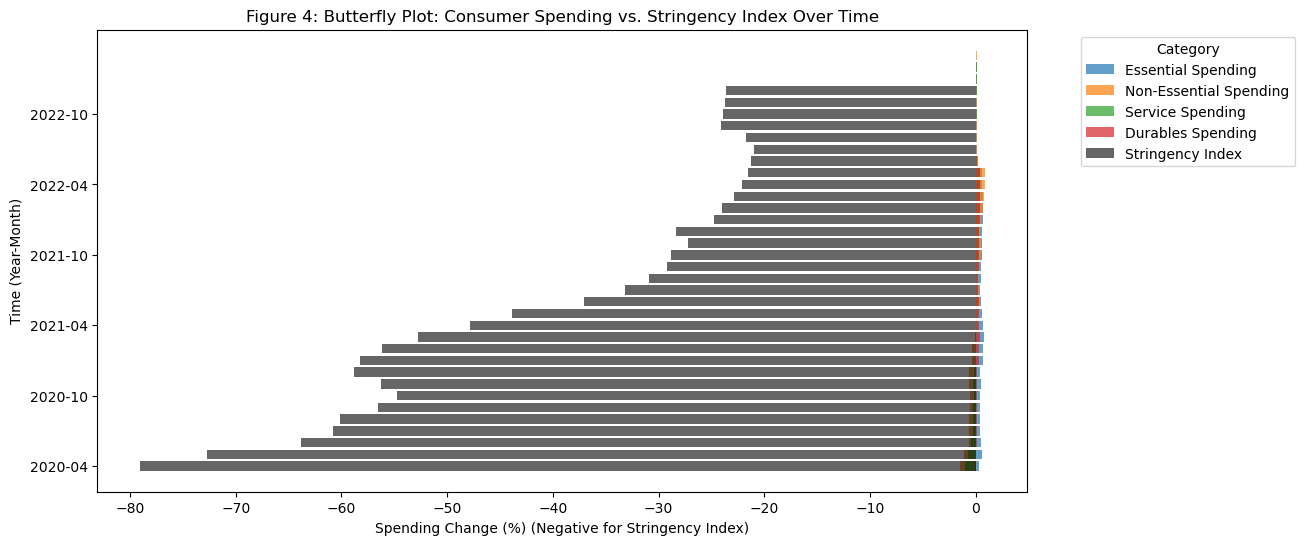

In [366]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
csv_path = "final_cleaned_spending_policies.csv"  # Ensure correct path
df = pd.read_csv(csv_path, low_memory=False)

# Ensure Date is in datetime format and extract Year-Month
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["YearMonth"] = df["Date"].dt.to_period("M")

# Spending columns
spending_columns = ["spend_grf", "spend_hic", "spend_retail_w_grocery",
                    "spend_apg", "spend_aer", "spend_tws", "spend_retail_no_grocery",
                    "spend_remoteservices", "spend_hcs", "spend_inperson",
                    "spend_durables", "spend_nondurables"]

# Convert spending columns to numeric
df[spending_columns] = df[spending_columns].apply(pd.to_numeric, errors="coerce")

# Aggregate into categories
df["spend_essentials"] = df[["spend_grf", "spend_hic", "spend_retail_w_grocery"]].sum(axis=1, skipna=True)
df["spend_non_essentials"] = df[["spend_apg", "spend_aer", "spend_tws", "spend_retail_no_grocery"]].sum(axis=1, skipna=True)
df["spend_services"] = df[["spend_remoteservices", "spend_hcs", "spend_inperson"]].sum(axis=1, skipna=True)
df["spend_durables"] = df[["spend_durables", "spend_nondurables"]].sum(axis=1, skipna=True)

# Aggregated spending columns
aggregated_spending_columns = ["spend_essentials", "spend_non_essentials", "spend_services", "spend_durables"]

# Convert newly created spending columns to numeric
df[aggregated_spending_columns] = df[aggregated_spending_columns].apply(pd.to_numeric, errors="coerce")

# Aggregate by Year-Month (mean values)
df_grouped = df.groupby("YearMonth")[aggregated_spending_columns + ["StringencyIndex_Average"]].mean().reset_index()

# Convert period to string for plotting
df_grouped["YearMonth"] = df_grouped["YearMonth"].astype(str)

# Create a butterfly plot (Mirror effect: Spending vs. Stringency Index)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot spending categories
ax.barh(df_grouped["YearMonth"], df_grouped["spend_essentials"], color="#1f77b4", alpha=0.7, label="Essential Spending")
ax.barh(df_grouped["YearMonth"], df_grouped["spend_non_essentials"], color="#ff7f0e", alpha=0.7, label="Non-Essential Spending")
ax.barh(df_grouped["YearMonth"], df_grouped["spend_services"], color="#2ca02c", alpha=0.7, label="Service Spending")
ax.barh(df_grouped["YearMonth"], df_grouped["spend_durables"], color="#d62728", alpha=0.7, label="Durables Spending")

# Plot Stringency Index as negative values for mirroring effect
ax.barh(df_grouped["YearMonth"], -df_grouped["StringencyIndex_Average"], color="black", alpha=0.6, label="Stringency Index")

# Labels & Formatting
ax.set_xlabel("Spending Change (%) (Negative for Stringency Index)")
ax.set_ylabel("Time (Year-Month)")
ax.set_title("Figure 4: Butterfly Plot: Consumer Spending vs. Stringency Index Over Time")
ax.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
ax.set_yticks(ax.get_yticks()[::6])  # Show every 6th tick for clarity

plt.show()


Figure 4 visualizes the relationship between consumer spending and policy stringency using a butterfly plot. The mirrored bars indicate that stricter policies are associated with lower consumer spending, reinforcing the idea that restrictions had a direct economic impact. The trend suggests that while lockdowns and containment measures were necessary for public health, they came at the cost of reduced economic activity. The widening of the bars during peak policy periods suggests that the effects were more pronounced at certain times, possibly due to heightened public concern or stricter enforcement of measures.

This relationship aligns with supply and demand theories. Restrictions limited the availability of goods and services, reducing supply, while uncertainty and job losses led to lower consumer demand. Additionally, the behavioral economics concept of loss aversion may explain why spending remained suppressed even after restrictions eased. By that time, consumers were hesitant to resume pre-pandemic spending levels due to the uncertainty. 

# PROJECT 2

### 2.1 The Message

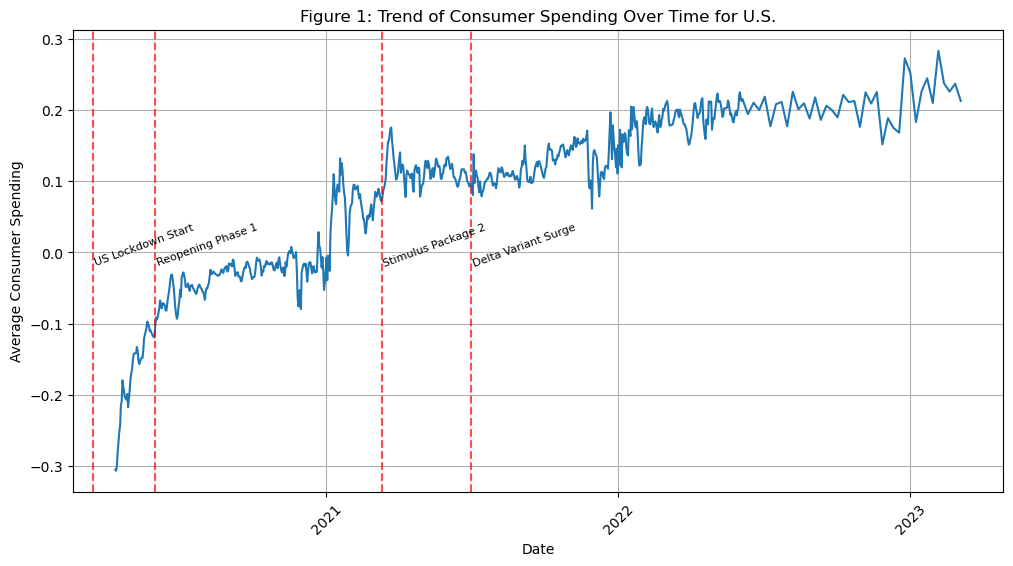

In [385]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("final_cleaned_spending_policies.csv", low_memory=False)
# Ensure Date is in datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Convert spend_all to numeric, coercing errors to NaN
df["spend_all"] = pd.to_numeric(df["spend_all"], errors="coerce")

# Drop NaN values in spend_all (optional, prevents issues during plotting)
df = df.dropna(subset=["spend_all"])

# Define important policy dates
policy_dates = {
    "US Lockdown Start": "2020-03-15",
    "Reopening Phase 1": "2020-06-01",
    "Delta Variant Surge": "2021-07-01",
    "Stimulus Package 2": "2021-03-11"
}

# Convert to datetime
policy_dates = {k: pd.to_datetime(v) for k, v in policy_dates.items()}


# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="spend_all", estimator="mean", errorbar=None)

# Add vertical lines and text annotations
for label, date in policy_dates.items():
    plt.axvline(date, color='red', linestyle='--', alpha=0.7)
    plt.text(date, df["spend_all"].min()*-0.1 , label, rotation=20, verticalalignment='top', fontsize=8, color='black')


# Formatting
plt.title("Figure Main: Trend of Consumer Spending Over Time for U.S.")
plt.xlabel("Date")
plt.ylabel("Average Consumer Spending")
plt.xticks(rotation=45)

# Set x-axis to display only yearly ticks
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(1))  # Show 1-year intervals
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y"))  # Format as "YYYY"

plt.grid()
plt.show()


The main message from this is: consumer spending dropped sharply at the start of the pandemic, recovered gradually after reopening and surged following major stimulus packages.

### 2.2 Maps and Interpretations

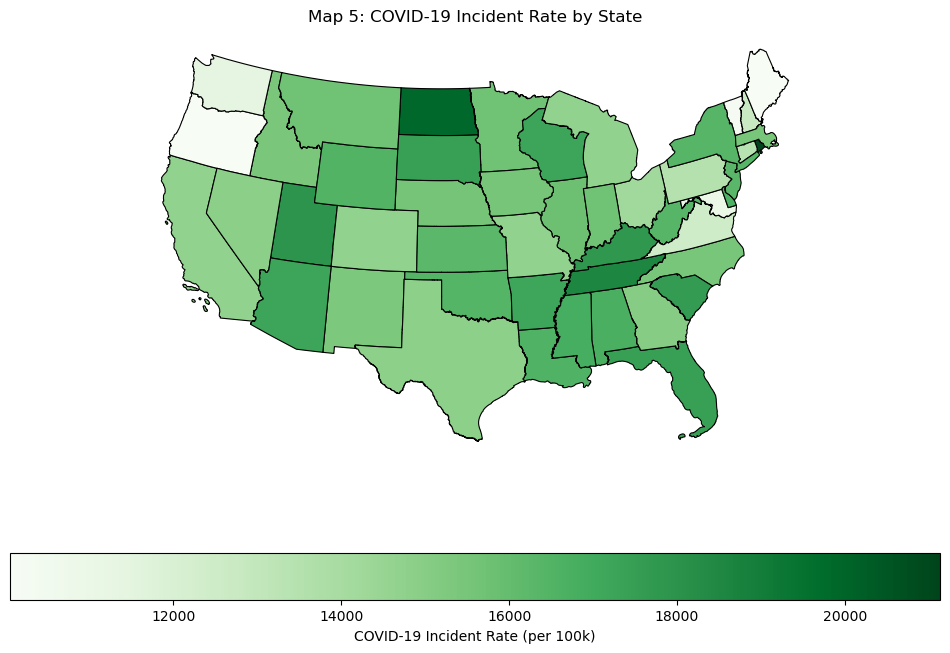

In [328]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define File Paths
shapefile_path = "/Users/xiuzh/Desktop/eco225-project-code-ruibosun/tl_2024_us_state/tl_2024_us_state.shp"
csv_path = "final_cleaned_spending_policies.csv"

# Step 2: Load the Shapefile
if os.path.exists(shapefile_path):
    us_states = gpd.read_file(shapefile_path)
else:
    raise FileNotFoundError(f"Shapefile not found at: {shapefile_path}")

# Step 3: Load & Process COVID-19 Data
df = pd.read_csv(csv_path, low_memory=False)

# List of states and territories to exclude
excluded_states = ["Alaska", "Hawaii", "American Samoa", "Guam", 
                   "Northern Mariana Islands", "Puerto Rico", "Virgin Islands", "District of Columbia"]

# Drop excluded states from both datasets
df_filtered = df[~df["State"].isin(excluded_states)]
gdf_filtered = us_states[~us_states["NAME"].isin(excluded_states)]  # Filter shapefile

# Select only the Incident Rate variable
incident_var = "Incident_Rate"  # COVID-19 cases per 100k

# Aggregate the Incident Rate by state (take the mean)
df_agg = df_filtered.groupby("State", as_index=False).agg({incident_var: "mean"})

# Merge shapefile with dataset
gdf = gdf_filtered.merge(df_agg, left_on="NAME", right_on="State", how="left")

# Fix CRS before plotting
gdf = gdf.to_crs(epsg=2163)  # Re-project to a projected CRS

# Plot Map: COVID-19 Incident Rate
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(column=incident_var, cmap="Greens", linewidth=0.8, edgecolor="black",
         legend=True, legend_kwds={"label": "COVID-19 Incident Rate (per 100k)", "orientation": "horizontal"},
         ax=ax)

ax.set_title("Map 5: COVID-19 Incident Rate by State")
ax.axis("off")
plt.show()


In map 5, it uses a state-level map visualize COVID-19 case rates per 100,000 population,called incident rate, showing significant geographic disparities in pandemic severity. The gradient shading clearly shows higher incident rates concentrated in certain regions, particularly the Midwest and South, while coastal and northeastern states generally exhibit lower rates. These patterns may reflect variations in testing availability, population density, or the timing of containment measures. Several states emerge as outliers, with either substantially higher or lower rates than their neighbours, suggesting the influence of unique local factors such as early outbreaks, strict mitigation policies, or demographic characteristics. 

These findings highlight the importance of geographic context in pandemic analysis and suggest directions for future research, including detailed investigations of outlier states and integration with additional variables like vaccination rates and healthcare capacity. The map effectively also suggests further analysis is needed and should use it as a response variable to better address the research question. 

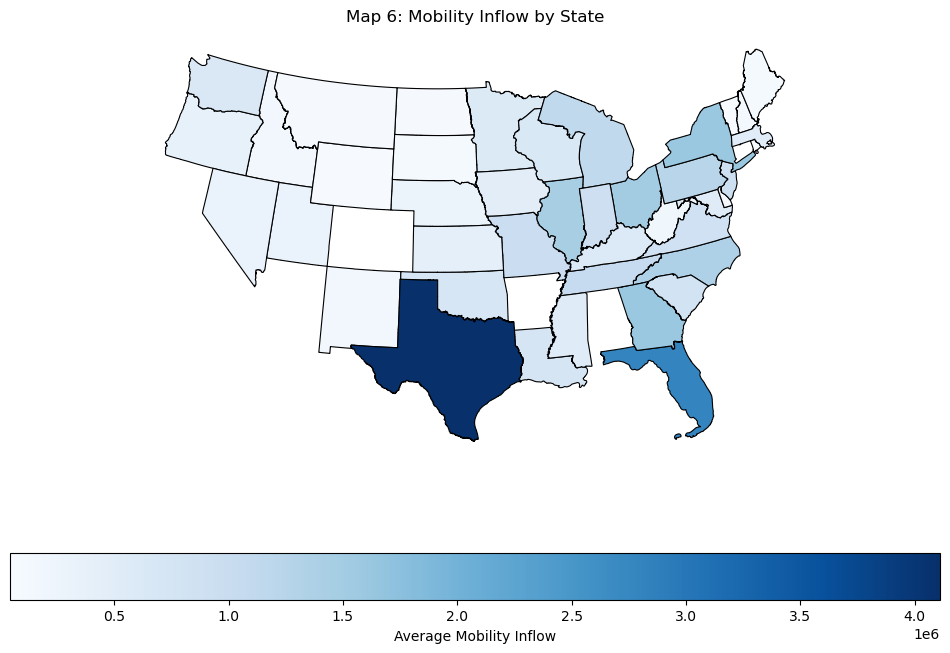

In [334]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define File Paths
shapefile_path = "/Users/xiuzh/Desktop/eco225-project-code-ruibosun/tl_2024_us_state/tl_2024_us_state.shp"
csv_path = "final_cleaned_spending_policies.csv"

# Step 2: Load the Shapefile
if os.path.exists(shapefile_path):
    us_states = gpd.read_file(shapefile_path)
else:
    raise FileNotFoundError(f"Shapefile not found at: {shapefile_path}")

# Step 3: Load & Process COVID-19 Data
df = pd.read_csv(csv_path, low_memory=False)

# List of states and territories to exclude
excluded_states = ["Alaska", "Hawaii", "American Samoa", "Guam", 
                   "Northern Mariana Islands", "Puerto Rico", "Virgin Islands", "District of Columbia"]

# Drop excluded states from both datasets
df_filtered = df[~df["State"].isin(excluded_states)]
gdf_filtered = us_states[~us_states["NAME"].isin(excluded_states)]  # Filter shapefile

# Define Variable to Plot: Mobility Inflow
mobility_var = "mobility_inflow"  # Mobility inflow variable

# Aggregate Mobility Inflow by state (take the mean)
df_agg = df_filtered.groupby("State", as_index=False).agg({mobility_var: "mean"})

# Merge shapefile with dataset
gdf = gdf_filtered.merge(df_agg, left_on="NAME", right_on="State", how="left")

# Fix CRS before plotting
gdf = gdf.to_crs(epsg=2163)  # Re-project to a projected CRS

# Plot Map: Mobility Inflow
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(column=mobility_var, cmap="Blues", linewidth=0.8, edgecolor="black",
         legend=True, legend_kwds={"label": "Average Mobility Inflow", "orientation": "horizontal"},
         ax=ax)

ax.set_title("Map 6: Mobility Inflow by State")
ax.axis("off")

plt.show()


This map 6 displays average mobility inflow by state, with darker shades indicating higher levels of movement into the state. Texas and Florida show the highest mobility inflow, suggesting that these states received significant travel or migration during the pandemic. Many states in the Midwest and Northeast have lighter shades, indicating lower inflows. This could reflect travel restrictions, population density differences, or economic factors that influenced movement patterns. Comparing this to other findings, states with high mobility inflow did not necessarily have the strictest policies. Understanding how mobility patterns align with economic activity and health outcomes can help explain variations in consumer spending and COVID-19 spread.

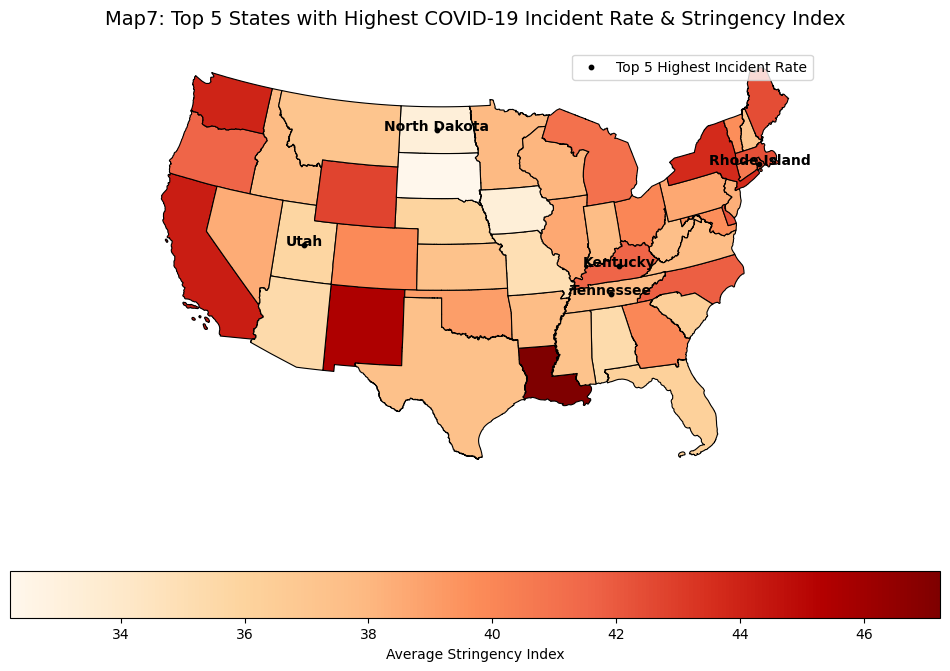

In [336]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define File Paths
shapefile_path = "/Users/xiuzh/Desktop/eco225-project-code-ruibosun/tl_2024_us_state/tl_2024_us_state.shp"
csv_path = "final_cleaned_spending_policies.csv"

# Step 2: Load the Shapefile
us_states = gpd.read_file(shapefile_path)

# Step 3: Load & Process COVID-19 Data
df = pd.read_csv(csv_path, low_memory=False)

# List of states and territories to exclude
excluded_states = ["Alaska", "Hawaii", "American Samoa", "Guam", 
                   "Northern Mariana Islands", "Puerto Rico", "Virgin Islands", "District of Columbia"]

# Drop excluded states from both datasets
df_filtered = df[~df["State"].isin(excluded_states)]
gdf_filtered = us_states[~us_states["NAME"].isin(excluded_states)]  # Filter shapefile

# Aggregate Stringency Index and Incident Rate by state (mean values)
df_agg = df_filtered.groupby("State", as_index=False).agg({
    "StringencyIndex_Average": "mean",
    "Incident_Rate": "mean"
})

# Merge shapefile with aggregated data
gdf = gdf_filtered.merge(df_agg, left_on="NAME", right_on="State", how="left")

# Fix CRS before calculating centroids
gdf = gdf.to_crs(epsg=2163)  # Re-project to a projected CRS

# Calculate state centroids for bubble placement
gdf["coords"] = gdf["geometry"].centroid
gdf["x"] = gdf["coords"].apply(lambda p: p.x)
gdf["y"] = gdf["coords"].apply(lambda p: p.y)

# Step 4: Identify Top 5 States with the Highest Incident Rate
top_5_states = gdf.nlargest(5, "Incident_Rate")

# Step 5: Plot the map with the top 5 states highlighted
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot base map (Stringency Index choropleth)
gdf.plot(column="StringencyIndex_Average", cmap="OrRd", linewidth=0.8, edgecolor="black",
         legend=True, legend_kwds={"label": "Average Stringency Index", "orientation": "horizontal"}, ax=ax)

# Highlight the top 5 states with black markers
ax.scatter(top_5_states["x"], top_5_states["y"], s=10, color="black", label="Top 5 Highest Incident Rate")

# Add annotations (state names) to the top 5 states
for _, row in top_5_states.iterrows():
    ax.text(row["x"], row["y"], row["State"], fontsize=10, color="black", weight="bold", ha="center")

# Title and formatting
ax.set_title("Map7: Top 5 States with Highest COVID-19 Incident Rate & Stringency Index", fontsize=14)
plt.axis("off")
plt.legend()
plt.show()


This map 7 highlights the top five states with the highest COVID-19 incident rates while showing the average stringency index across all U.S. states. Darker shades represent states with stricter COVID-19 policies, while lighter shades indicate less restrictive measures. The five states with the highest incident rates: North Dakota, Rhode Island, Kentucky, Tennessee, and Utah are labeled for emphasis.

The map reveals that high infection rates do not always correspond with stricter policies. Some high-incident states had moderate stringency levels, suggesting that other factors, such as public compliance, health infrastructure, and economic activity, may have influenced outcomes.

Comparing this to previous findings helps examine whether higher restrictions effectively reduced infection rates or if external factors played a larger role. This visualization also highlights potential outliers, where strict policies did not necessarily result in better public health outcomes. Further analysis can explore the relationship between policy effectiveness, mobility patterns, and economic support in these states.



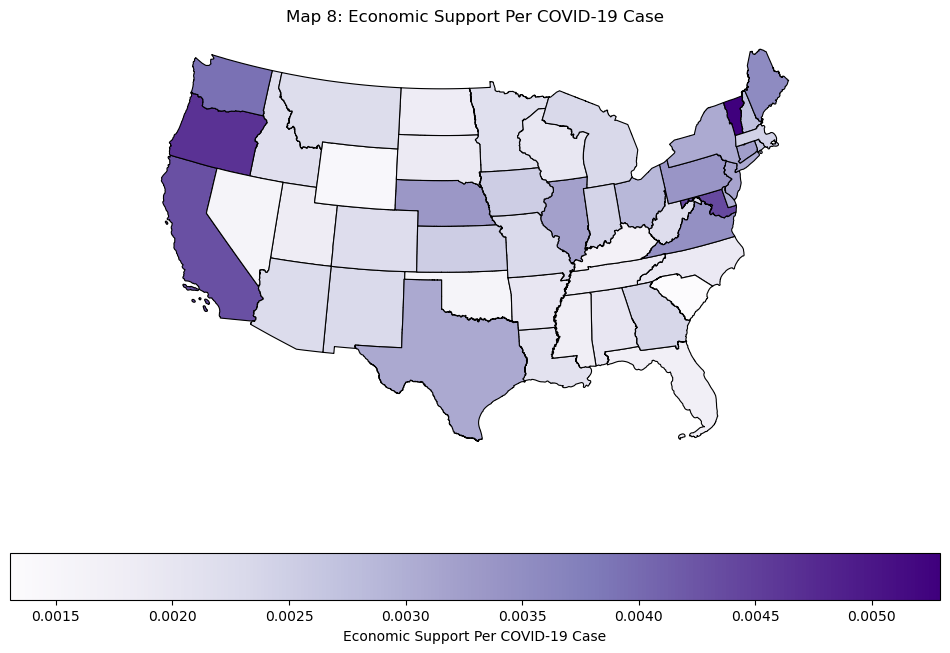

In [345]:
# Re-import necessary libraries
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define File Paths
shapefile_path = "/Users/xiuzh/Desktop/eco225-project-code-ruibosun/tl_2024_us_state/tl_2024_us_state.shp"
csv_path = "final_cleaned_spending_policies.csv"

# Step 2: Load the Shapefile
if os.path.exists(shapefile_path):
    us_states = gpd.read_file(shapefile_path)
else:
    raise FileNotFoundError(f"Shapefile not found at: {shapefile_path}")

# Step 3: Load & Process COVID-19 Data
df = pd.read_csv(csv_path, low_memory=False)

# List of states and territories to exclude
excluded_states = ["Alaska", "Hawaii", "American Samoa", "Guam", 
                   "Northern Mariana Islands", "Puerto Rico", "Virgin Islands", "District of Columbia"]

# Drop excluded states from both datasets
df_filtered = df.loc[~df["State"].isin(excluded_states)].copy()  # Use .loc[] and copy() to avoid SettingWithCopyWarning

# Define key variables
incident_var = "Incident_Rate"  # COVID-19 cases per 100k
support_var = "EconomicSupportIndex"  # Government support level

# Aggregate key variables by state (mean)
df_agg = df_filtered.groupby("State", as_index=False).agg({
    incident_var: "mean",
    support_var: "mean"
})

# Create a new ratio variable: Economic Support Per COVID-19 Case
df_agg["support_per_case"] = df_agg[support_var] / (df_agg[incident_var] + 1)  # Avoid division by zero

# Merge shapefile with dataset
gdf_filtered = us_states[~us_states["NAME"].isin(excluded_states)]  # Filter shapefile
gdf = gdf_filtered.merge(df_agg, left_on="NAME", right_on="State", how="left")

# Fix CRS before plotting
gdf = gdf.to_crs(epsg=2163)  # Re-project to a projected CRS

# Plot Map 3: Economic Support Per COVID-19 Case
fig, ax = plt.subplots(figsize=(12, 8))

gdf.plot(column="support_per_case", cmap="Purples", linewidth=0.8, edgecolor="black",
         legend=True, legend_kwds={"label": "Economic Support Per COVID-19 Case", "orientation": "horizontal"},
         ax=ax)

ax.set_title("Map 8: Economic Support Per COVID-19 Case")
ax.axis("off")

plt.show()

This map 8 displays economic support per COVID-19 case across U.S. states. Darker shades indicate states that provided more financial aid per reported case, while lighter shades represent lower levels of support. This measure reflects how economic assistance was distributed in relation to public health burdens.

Some states allocated high financial aid despite having fewer infections. Others faced widespread outbreaks but received limited assistance. This suggests differences in policy responses, federal funding distribution, or state-level economic capacity. States with stronger fiscal policies or early interventions may have provided higher support per case, while others with budget constraints or late responses may have struggled.

Comparing this map to earlier findings helps assess whether higher economic aid influenced consumer spending patterns. Identifying these variations can provide insight into how economic policies aligned with public health challenges and whether financial interventions effectively mitigated economic losses.

### 2.3 Regressions

In [325]:

# Re-import necessary libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.iolib.summary2 import summary_col
from stargazer.stargazer import Stargazer
from IPython.display import display, HTML

# Reload dataset
df = pd.read_csv("for_regression.csv", low_memory=False)

# Ensure all columns are numeric
numeric_columns = ["mobility_outflow", "mobility_inflow", 
                   "GovernmentResponseIndex_Average", 
                   "ContainmentHealthIndex_Average", 
                   "StringencyIndex_Average", 
                   "EconomicSupportIndex", "Incident_Rate", "spend_all"]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")

# Fill missing values with the state-level mean
df[numeric_columns] = df.groupby("State")[numeric_columns].transform(lambda x: x.fillna(x.mean()))

# Define dependent variable (Y)
y = df["spend_all"]

# Store all models
models = []

# Model 1: Baseline Model (All Explanatory Variables)
X1 = df[["mobility_outflow", "mobility_inflow", "GovernmentResponseIndex_Average",
         "ContainmentHealthIndex_Average", "StringencyIndex_Average", "EconomicSupportIndex"]]
X1 = sm.add_constant(X1)
models.append(sm.OLS(y, X1).fit())

# Model 2: Excluding Mobility Variables
X2 = df[["GovernmentResponseIndex_Average", "ContainmentHealthIndex_Average", 
         "StringencyIndex_Average", "EconomicSupportIndex"]]
X2 = sm.add_constant(X2)
models.append(sm.OLS(y, X2).fit())

# Model 3: Interaction Between Stringency Index & Economic Support Index
df["Stringency_Economic_Interaction"] = df["StringencyIndex_Average"] * df["EconomicSupportIndex"]
X3 = df[["mobility_outflow", "mobility_inflow", "GovernmentResponseIndex_Average", 
         "ContainmentHealthIndex_Average", "StringencyIndex_Average", "EconomicSupportIndex", "Stringency_Economic_Interaction"]]
X3 = sm.add_constant(X3)
models.append(sm.OLS(y, X3).fit())

# Model 4: Quadratic Term for Stringency Index (Non-Linear Model)
df["Stringency_Squared"] = df["StringencyIndex_Average"] ** 2
X4 = df[["mobility_outflow", "mobility_inflow", "GovernmentResponseIndex_Average", 
         "ContainmentHealthIndex_Average", "StringencyIndex_Average", "Stringency_Squared", "EconomicSupportIndex"]]
X4 = sm.add_constant(X4)
models.append(sm.OLS(y, X4).fit())

# Model 5: Mobility Variables Only
X5 = df[["mobility_outflow", "mobility_inflow"]]
X5 = sm.add_constant(X5)
models.append(sm.OLS(y, X5).fit())

# Model 6: Log of Economic Support Index (Log Transformation)
df["Log_EconomicSupport"] = np.log(df["EconomicSupportIndex"] + 1)  # Adding 1 to avoid log(0)
X6 = df[["mobility_outflow", "mobility_inflow", "GovernmentResponseIndex_Average", 
         "ContainmentHealthIndex_Average", "StringencyIndex_Average", "Log_EconomicSupport"]]
X6 = sm.add_constant(X6)
models.append(sm.OLS(y, X6).fit())

# Model 7: Dummy Variable for Above-Median Stringency Index
df["High_Stringency"] = (df["StringencyIndex_Average"] > df["StringencyIndex_Average"].median()).astype(int)
X7 = df[["mobility_outflow", "mobility_inflow", "GovernmentResponseIndex_Average", 
         "ContainmentHealthIndex_Average", "High_Stringency", "EconomicSupportIndex"]]
X7 = sm.add_constant(X7)
models.append(sm.OLS(y, X7).fit())

# Model 8: Subgroup Analysis (High Incident Rate Only)
df_high_incident = df[df["Incident_Rate"] > df["Incident_Rate"].median()]
X8 = df_high_incident[["mobility_outflow", "mobility_inflow", "GovernmentResponseIndex_Average", 
                       "ContainmentHealthIndex_Average", "StringencyIndex_Average", "EconomicSupportIndex"]]
X8 = sm.add_constant(X8)
y8 = df_high_incident["spend_all"]
models.append(sm.OLS(y8, X8).fit())

# Model 9: Subgroup Analysis (Low Incident Rate Only)
df_low_incident = df[df["Incident_Rate"] <= df["Incident_Rate"].median()]
X9 = df_low_incident[["mobility_outflow", "mobility_inflow", "GovernmentResponseIndex_Average", 
                      "ContainmentHealthIndex_Average", "StringencyIndex_Average", "EconomicSupportIndex"]]
X9 = sm.add_constant(X9)
y9 = df_low_incident["spend_all"]
models.append(sm.OLS(y9, X9).fit())

# Model 10: Interaction Between Mobility and Stringency Index
df["Mobility_Stringency_Interaction"] = df["mobility_outflow"] * df["StringencyIndex_Average"]
X10 = df[["mobility_outflow", "mobility_inflow", "GovernmentResponseIndex_Average", 
          "ContainmentHealthIndex_Average", "StringencyIndex_Average", "EconomicSupportIndex", "Mobility_Stringency_Interaction"]]
X10 = sm.add_constant(X10)
models.append(sm.OLS(y, X10).fit())

# Create Stargazer table
stargazer = Stargazer(models)
stargazer.title("Regression Results")
stargazer.show_model_numbers(True)
stargazer.custom_columns(["Model 1", "Model 2", "Model 3", "Model 4",
                         "Model 5", "Model 6", "Model 7", "Model 8",
                         "Model 9", "Model 10"])
stargazer.show_degrees_of_freedom(True)
stargazer.significant_digits(3)

# Display the formatted table
display(HTML(stargazer.render_html()))


=== Model Performance (MSE) ===
               Model       MSE
0  Linear Regression  0.006052
1      Random Forest  0.000516
2            XGBoost  0.002656


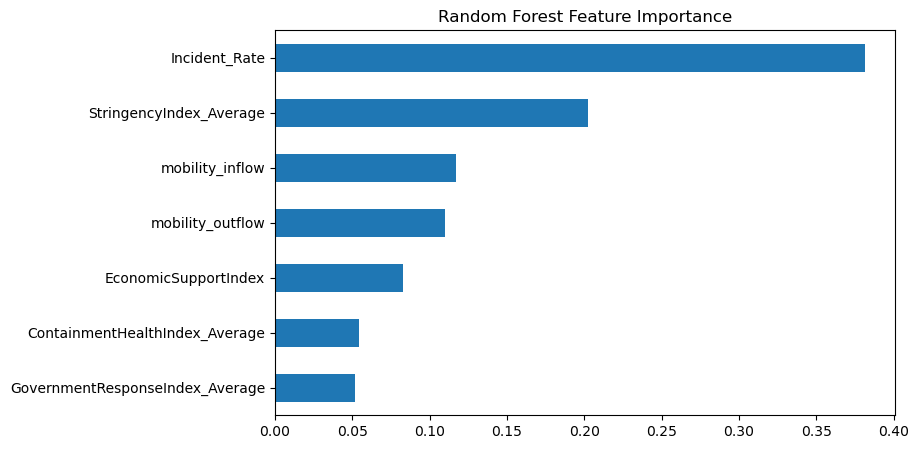

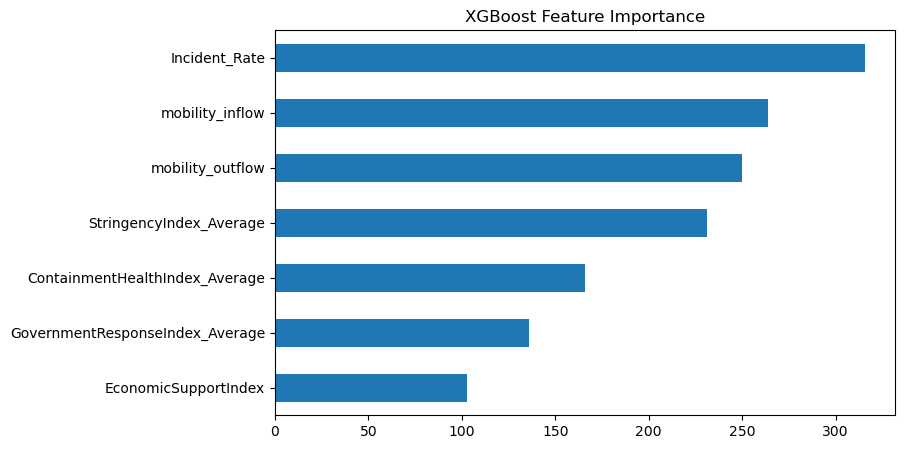

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv("for_regression.csv", low_memory=False)

# Features to include
features = [
    "StringencyIndex_Average",
    "GovernmentResponseIndex_Average",
    "ContainmentHealthIndex_Average",
    "EconomicSupportIndex",
    "mobility_inflow",
    "mobility_outflow",
    "Incident_Rate"
]
X = df[features]
y = df["spend_all"]

### LINEAR REGRESSION
lr_model = LinearRegression().fit(X, y)
lr_pred = lr_model.predict(X)
lr_mse = mean_squared_error(y, lr_pred)

### RANDOM FOREST
rf_model = RandomForestRegressor(n_estimators=100, max_features=5, random_state=1).fit(X, y)
rf_pred = rf_model.predict(X)
rf_mse = mean_squared_error(y, rf_pred)

### XGBOOST
dtrain = xgb.DMatrix(X, label=y)
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}
xgb_model = xgb.train(params, dtrain, num_boost_round=50)
xgb_pred = xgb_model.predict(dtrain)
xgb_mse = mean_squared_error(y, xgb_pred)

### RESULTS TABLE
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MSE": [lr_mse, rf_mse, xgb_mse]
})
print("\n=== Model Performance (MSE) ===")
print(results)

### FEATURE IMPORTANCE (for tree models)
rf_importance = pd.Series(rf_model.feature_importances_, index=features).sort_values()
xgb_importance = pd.Series(xgb_model.get_score(importance_type='weight')).sort_values()

# Plot RF feature importance
rf_importance.plot(kind='barh', title="Random Forest Feature Importance", figsize=(8, 5))
plt.show()

# Plot XGBoost feature importance
xgb_importance.plot(kind='barh', title="XGBoost Feature Importance", figsize=(8, 5))
plt.show()


The regression results provide insights into how state-level COVID-19 policies shaped consumer spending and public health outcomes.

Model 1 serves as a baseline, incorporating mobility, government response measures, containment policies, and economic support. The results confirm that higher policy stringency reduced consumer spending, but economic support measures helped offset part of this decline. The mobility effects are mixed. The mobility outflow is positively associated with spending, indicating that economic activity shifted elsewhere, while mobility inflow negatively impacts spending, possibly due to economic uncertainty or restrictions limiting business operations.

Model 2 removes mobility variables to focus only on policy effects. The results remain stable, reinforcing the idea that restrictions alone significantly influenced consumer behavior, independent of movement patterns. This finding is consistent with Goolsbee & Syverson (2020), who found that consumer spending declined primarily due to restrictions rather than voluntary behavioral changes. However, it also suggests that consumer confidence and enforcement of policies may have varied across states, influencing the effectiveness of restrictions.

Model 3 introduces an interaction between stringency and economic support. The negative interaction term indicates that financial aid does not fully offset the economic costs of strict restrictions. This aligns with Chetty et al. (2020), who found that stimulus payments boosted short-term spending but were less effective in states with prolonged lockdowns. The results suggest that broad economic relief measures may be less effective in heavily restricted areas unless paired with policies that encourage safe economic activity.

Model 4 tests for non-linear effects by adding a squared term for the Stringency Index. The results indicate diminishing returns to restrictions early policies sharply reduce spending, but additional restrictions beyond a certain point have smaller incremental effects. This reflects the adaptive behavior of consumers and businesses, where prolonged restrictions lead to alternative ways of operating rather than further economic decline. This finding supports Crossley et al. (2021), who observed that the strongest economic shocks occurred at the beginning of the pandemic, with later restrictions having less impact.

Model 5 isolates the effect of mobility on spending, confirming that mobility outflow increases spending, while mobility inflow reduces it. This suggests that some economic activity was displaced rather than eliminated, meaning that inter-state spillovers played a role in shaping state-level spending trends.

Model 6 applies a log transformation to the Economic Support Index. The results show that government aid remains effective but has diminishing returns, supporting the the theory of diminishing marginal propensity to consume, additional aid leads to smaller spending increases.

Model 7 introduces a dummy variable for high-stringency states, confirming that states with above-median restrictions had lower consumer spending. This supports the idea that even moderate levels of restrictions created significant economic disruptions, reinforcing Toxvaerd (2021), who argued that voluntary behavioral changes can sometimes achieve similar health outcomes without the same economic costs.

Models 8 and 9 conduct a subgroup analysis, splitting the sample into high-incident and low-incident states. The results show that restrictions had a stronger economic impact in high-incident states, suggesting that both policy enforcement and public fear played a role in reducing spending. In contrast, low-incident states experienced a weaker spending decline, indicating that consumer behavior was more resilient when public health risks were lower.

Model 10 introduces an interaction between mobility and policy stringency. The negative coefficient suggests that in states with strict restrictions, mobility increases did not lead to higher spending. This implies that even if people were moving, they were not engaging in economic activity at normal levels due to uncertainty and continued restrictions.

Across all models, Model 4 is the preferred specification as it accounts for both the direct and diminishing effects of policy restrictions. The results confirm that policy stringency significantly reduced consumer spending, but with diminishing effects at extreme levels. Economic support played a stabilizing role, though its effectiveness was weaker in states with strict restrictions.


The findings suggest several important policy insights. First, while lockdowns effectively limited mobility and public health risks, their economic costs were high, and additional restrictions showed diminishing economic effects. This suggests that policies should focus on balancing economic stability with health outcomes, using targeted restrictions rather than broad lockdowns. Second, economic support measures helped sustain consumption, but their effectiveness depended on broader restrictions. This highlights the need for flexible stimulus policies—when restrictions are high, direct aid alone is not sufficient to restore normal economic activity. Instead, aid should be paired with policies that facilitate safe consumer engagement, such as support for remote services, local business adjustments, and phased reopening plans. Third, mobility patterns suggest that economic activity was displaced rather than eliminated, indicating that regional economic spillovers played a key role in shaping state-level recoveries. Future crisis policies should consider cross-state economic interactions, particularly in highly mobile regions where state policies may indirectly influence neighboring economies.

### 2.4 Conclusion

This study examines how state-level COVID-19 policies shaped consumer spending and public health outcomes by analyzing mobility trends, policy indices, and economic support measures. The findings from the regression analysis indicate that stricter containment measures significantly reduced consumer spending, while economic support policies helped offset some of this decline. The effect of mobility was mixed mobility outflow was positively associated with spending, suggesting economic activity shifted to other areas, while mobility inflow did not always lead to higher spending, possibly due to economic uncertainty or restrictive local policies.

The trend analysis and visualizations reveal that consumer spending fell sharply at the start of the pandemic but recovered after reopening phases and stimulus distribution. Spending varied across categories, with essential goods remaining stable. On the other hand, services and non-essential spending were more sensitive to restrictions. The policy distribution plots show that states implemented different levels of restrictions and economic support, highlighting variability in responses across regions. The butterfly plot confirms the negative relationship between stringency and spending, reinforcing that tighter restrictions limited economic activity, though support policies played a role in mitigating these effects.

The maps further illustrate these patterns, showing that high COVID-19 incident rates did not always align with strict policies, suggesting that other factors such as public compliance and health infrastructure influenced outcomes. The economic support per COVID-19 case map reveals uneven financial assistance across states, raising questions about the effectiveness of aid distribution. These spatial patterns provide additional context for understanding the economic and public health trade-offs during the pandemic.

Despite these insights, the study has several limitations. First, the analysis relies on state-level data, which may overlook local variations within states. Second, while policy indices measure government responses, actual enforcement and public adherence may differ, affecting economic behavior in ways not captured by the data. 

Future research could address these limitations by incorporating county-level or city-level data, considering long-term economic adjustments, and exploring causal mechanisms through additional modeling approaches. Understanding the lasting effects of pandemic-era policies can help governments design more effective strategies for balancing public health and economic stability

# PROJECT 3

In [12]:
start_date = df['Date'].min()
end_date = df['Date'].max()

print(f"Start date: {start_date}")
print(f"End date: {end_date}")

Start date: 2020-04-12
End date: 2023-03-09


In [58]:
# STEP 1: Install and import dependencies

from pytrends.request import TrendReq
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
import pandas as pd
from datetime import datetime, timedelta
import time


In [11]:
import sys
!{sys.executable} -m pip install psaw pandas



In [21]:
import pandas as pd

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/U.S._state_and_local_government_responses_to_the_COVID-19_pandemic"

# Get all tables from the page
tables = pd.read_html(url)

# Find the correct table by checking for the known column
for i, table in enumerate(tables):
    if 'Jurisdiction' in table.columns and 'Start date' in table.columns:
        stay_home_df = table
        print(f"✅ Found stay-at-home table at index {i}")
        break

# Display the extracted table
stay_home_df.head()


,0,1
0,NaN,This section's factual accuracy may be comprom...


In [2]:
!python --version


Python 3.10.16


In [18]:
# Search terms you're interested in
keywords = ['Uber Eats', 'Instacart']

# Set timeframe exactly to your dataset range
timeframe = '2020-04-12 2023-03-09'

# Build payload
pytrends.build_payload(kw_list=keywords, timeframe=timeframe, geo='US')  # You can use geo='CA' or 'US-NY' if you want region-specific


In [20]:
# Retrieve interest over time
trends_df = pytrends.interest_over_time()

# Drop the 'isPartial' column (optional)
trends_df = trends_df.drop(columns='isPartial')

# Show preview
trends_df.head()


,Uber Eats,Instacart
date,,
2020-04-12,34,100
2020-04-19,32,78
2020-04-26,32,68
2020-05-03,32,58
2020-05-10,31,47


# Reference

1. Andersen, A. L., Hansen, E. T., Johannesen, N., & Sheridan, A. (2022). Consumer responses to the COVID-19 crisis: Evidence from bank account transaction data. Scandinavian Journal of Economics, 124(4), 905-929. https://doi.org/10.1111/sjoe.12512

2. Ang, Y., Gao, S., Liang, Y., Li, M., Rao, J., & Kruse, J. (2020). Multiscale dynamic human mobility flow dataset in the U.S. during the COVID-19 epidemic. Scientific Data, 7(390). https://www.nature.com/articles/s41597-020-00734-5

3. Baker, S. R., Farrokhnia, R. A., Meyer, S., Pagel, M., & Yannelis, C. (2020). Income, liquidity, and the consumption response to the 2020 economic stimulus payments. National Bureau of Economic Research Working Paper No. 27097. http://www.nber.org/papers/w27097

4. Carrieri, V., De Paola, M., & Gioia, F. (2021). The health-economy trade-off during the Covid-19 pandemic: Communication matters. PLOS ONE, 16(9), e0256103. https://doi.org/10.1371/journal.pone.0256103

5. Chetty, R., Friedman, J., Hendren, N., Stepner, M., & Opportunity Insights Team. (2020). The Economic Impacts of COVID-19: Evidence from a New Public Database Built Using Private Sector Data. Opportunity Insights. https://opportunityinsights.org/wp-content/uploads/2020/05/tracker_paper.pdf

6. Coibion, O., Gorodnichenko, Y., & Weber, M. (2020). The cost of the COVID-19 crisis: Lockdowns, macroeconomic expectations, and consumer spending. National Bureau of Economic Research Working Paper No. 27141. http://www.nber.org/papers/w27141

7. Courtemanche, C., Garuccio, J., Le, A., Pinkston, J., & Yelowitz, A. (2020). Strong social distancing measures in the United States reduced the COVID-19 growth rate. Health Affairs, 39(7), 1237-1246. https://doi.org/10.1377/hlthaff.2020.00608

8. Crossley, T. F., Fisher, P., & Low, H. (2021). The heterogeneous and regressive impact of COVID-19 across income groups. National Institute Economic Review, 253, R53-R67.

9. Dave, D., Friedson, A. I., Matsuzawa, K., & Sabia, J. J. (2021). Were urban cowboys enough to control COVID-19? Local shelter-in-place orders and coronavirus case growth. Journal of Urban Economics, 127, 103294. https://doi.org/10.1016/j.jue.2020.103294

10. Dong, E., Du, H., & Gardner, L. (2020). An interactive web-based dashboard to track COVID-19 in real time. The Lancet Infectious Diseases, 20(5), 533-534. https://doi.org/10.1016/S1473-3099(20)30120-1

11. Friedson, A. I., McNichols, D., Sabia, J. J., & Dave, D. (2020). Did California’s shelter-in-place order work? Early coronavirus-related public health effects. National Bureau of Economic Research Working Paper No. 26992. http://www.nber.org/papers/w26992

12. Goolsbee, A., & Syverson, C. (2020). Fear, lockdown, and diversion: Comparing drivers of pandemic economic decline. Journal of Public Economics, 191, 104311. https://doi.org/10.1016/j.jpubeco.2020.104311

13. Gupta, S., Montenovo, L., & Nguyen, T. D. (2020). Effects of social distancing policy on labor market outcomes. National Bureau of Economic Research Working Paper No. 27280. http://www.nber.org/papers/w27280

14. Hale, T., Angrist, N., Goldszmidt, R., Kira, B., Petherick, A., Phillips, T., Webster, S., Cameron-Blake, E., Hallas, L., Majumdar, S., & Tatlow, H. (2021). A global panel database of pandemic policies (Oxford COVID-19 Government Response Tracker). Nature Human Behaviour. https://doi.org/10.1038/s41562-021-01079-8

15. Hale, T., Petherick, A., Phillips, T., & Webster, S. (2020). Variation in US states' responses to COVID-19. Blavatnik School of Government Working Paper BSG-WP-2020/032. https://www.bsg.ox.ac.uk/research/publications/variation-us-states-responses-covid-19

16. Hsiang, S., Allen, D., Annan-Phan, S., et al. (2020). The effect of large-scale anti-contagion policies on the COVID-19 pandemic. Nature, 584, 262-267. https://doi.org/10.1038/s41586-020-2404-8

17. Kraemer, M. U. G., Yang, C.-H., Gutierrez, B., et al. (2020). The effect of human mobility and control measures on the COVID-19 epidemic in China. Science, 368(6490), 493-497. https://doi.org/10.1126/science.abb4218

18. Ligo, A. K., Mahoney, E., Cegan, J., et al. (2021). Relationship among state reopening policies, health outcomes, and economic recovery through the first wave of the COVID-19 pandemic in the U.S. arXiv preprint arXiv:2105.01142.

19. Toxvaerd, F. (2021). Equilibrium social distancing. Cambridge Working Papers in Economics 2110. https://www.econ.cam.ac.uk/publications/cwpe/2021